# Jr. Data Scientist Business Case Results
### Juan Carlos Inclán Soto
### 26/01/2022

# Synopsis

The following project will present the answers for the Jr. Data Scientist Business Case for Marsh Senior Team members. The following project addresses  Telco Customer Churn problem and delivers a model that predicts customer churn as well as  5 client retention programs proposals to increase engagement. The data was delivered by a Marsh team member through GitHub. The data is from the Kaggle IBM Sample Datasets.

## Data and Libraries Loading Section 

##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#import seaborn as sns

##### Data Loading

In [2]:
telco_df=pd.read_csv("https://raw.githubusercontent.com/martmor123/jr_ds_test/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Exploratory Data Analysis

The first step to start building a predictive model is to explore the data, specifically look up for missing values or NA and duplicated data. These two concepts (Data Cleaning) are central in the data model building, which will reduce overfitting and underfitting bias.

Before cleaning the data, we will proceed to know the dataset by checking the number of rows, columns, and data types.

In [3]:
# Number of rows
len(telco_df.axes[0])

7043

In [4]:
# Number of columns
len(telco_df.axes[1])

21

In [5]:
# Data types
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


With the preview result we can assume that there is no evidence of missing data, which will be confirmed by using other techniques to spot missing data and looking for other kind of representations of missing data like the following:
1. n/a 
2. NA 
3. -
4. na
5. N/A
6. Error
7. ERROR

In [6]:
telco_df.isnull().values.any()

False

In [7]:
## None-Standard missing values
pd.read_csv("https://raw.githubusercontent.com/martmor123/jr_ds_test/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=["n/a", "N/A", "--", ".", "-", "NA","na", "Error", "ERROR", "error"]).isnull().values.any()

False

Now, we know that there are no missing values in the data, we will proceed to review for duplicated data. To review duplicated data, we will check the first 5 lines of the dataset.

In [8]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


It is clear that the column labeled "customerID" is the Primary Key of the data set, in order to find duplicate values, we should look up for duplicated data in this field.

In [9]:
telco_df.duplicated(['customerID']).sum()

0

We are almost ready to start the basic summaries and plotting of the data. In the data types table we observed that the field "TotalCharges" is an object instead of a float by contrasting it to the head of the dataset, which clearly shows a numeric value. We will proceed to transform the data type from object to float.

In [10]:
telco_df["TotalCharges"]=pd.to_numeric(telco_df["TotalCharges"], errors='coerce')
telco_df["TotalCharges"].isnull().values.any() 

True

We found out that exist missing values in the data, we will proceed to count them and decided if we apply an imputing technique to estimate the missing values and avoid information loss, which will translate in a underfitting predictive model.

In [11]:
TC_NAN_V=telco_df[telco_df["TotalCharges"].isnull()].index.tolist()
len(TC_NAN_V)

11

We found that 11 out of 7,043 records are missing values, we just could eliminate them because represent 0.1562% of the dataset, but we prefer to use an imputing technique with the mean, median or adding 0. It will depend on the outlier quantity located in the data. The imputing technique will be implemented because it is less than the 10% of the data that will be imputed.

In [12]:
pd.read_csv("https://raw.githubusercontent.com/martmor123/jr_ds_test/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv").loc[TC_NAN_V,:]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


We will use histogram and quantile analysis applied to the "TotalCharges" field to observe the data behavior to decide which imputing technique use.

C:\Users\juanc\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\juanc\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

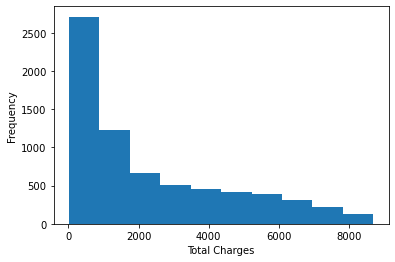

In [13]:
plt.hist(telco_df["TotalCharges"])
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

In [14]:
telco_df["TotalCharges"].quantile([.25,.5,.75,1])

0.25     401.4500
0.50    1397.4750
0.75    3794.7375
1.00    8684.8000
Name: TotalCharges, dtype: float64

We will impute the data through the median because of the distribution of the data shown by the quantiles and the histogram plot. Due to the last 25% of the data that exceeds whit a range of 8,684.8-3,794.7375=4,8903.0624, which is more than the range where 75% data distribution.

In [15]:
telco_df["TotalCharges"]=telco_df["TotalCharges"].fillna(telco_df["TotalCharges"].median())

In [16]:
telco_df.loc[TC_NAN_V,"TotalCharges"]

488     1397.475
753     1397.475
936     1397.475
1082    1397.475
1340    1397.475
3331    1397.475
3826    1397.475
4380    1397.475
5218    1397.475
6670    1397.475
6754    1397.475
Name: TotalCharges, dtype: float64

Now we are ready to start an exploratory analysis for selecting the predictive model that we are going to build. At first glance we will propose a Logistic Regression Model due to the "churn" field that seems to be a categoric variable, yes/no, but due to the amount of categoric variables in the dataset a Classifier Random Forest will be the best option for this case. If the dataset had more numeric variables than categoric a Logistic Regression Model was more feasible than a Classifier Random Forest for predicting the probability of a customer becoming churn.

We have the hypothesis that we have more clients from one gender than the other.

In [17]:
# Propuesta, checar gender %
telco_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [18]:
3555/(3555+3488)

0.504756495811444

In [19]:
3488/(3555+3488)

0.495243504188556

The results reject that we have a dominant gender and show us that is balanced 50-50. Now we have the hypothesis that most of our clients are not senior citizens.

In [20]:
telco_df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

84% of our clients are not senior citizens, which confirms our hypothesis and could be a common characteristic in the retention plan programs.

In [21]:
5901/(5901+1142) #not senior

0.8378531875621185

In [22]:
1142/(5901+1142) #senior citizens

0.1621468124378816

Now, we will proceed to check churn clients.

In [23]:
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Approximately 27% of our clients are churn, this will translate in 1 every 3 clients will become churn. On the other hand, we would think that we have a higher churn rate from our senior clients than the rest of the clients.

In [24]:
1869/(1869+5174)

0.2653698707936959

The gender variable does not affect the distribution of clients between churns, this confirms that the gender distribution between our clients is 50/50.

In [25]:
telco_df.groupby(['gender','SeniorCitizen', 'Churn'])['customerID'].count()

gender  SeniorCitizen  Churn
Female  0              No       2221
                       Yes       699
        1              No        328
                       Yes       240
Male    0              No       2287
                       Yes       694
        1              No        338
                       Yes       236
Name: customerID, dtype: int64

In [26]:
telco_df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: customerID, dtype: int64

The churn rate is greater in the Senior Citizen side than in the rest of the clients it is 2 out of 5 Senior Citizen client will become churn. This would possibly be due to the learning curve or have higher expectancy of the service the senior citizens rather than younger clients, but for each senior client churn will be 2 young clients' churn.

In [27]:
telco_per_Churn=telco_df.groupby(['SeniorCitizen', 'Churn'])['customerID'].count()
telco_per_Churn.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))

SeniorCitizen  Churn
0              No       76.393832
               Yes      23.606168
1              No       58.318739
               Yes      41.681261
Name: customerID, dtype: float64

In [28]:
print(telco_per_Churn)

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: customerID, dtype: int64


Now we will proceed to check tenure division of the clients with the company to observe their distribution and analyze if the client with more tenure is less likely to become churn.

In [29]:
telco_df["tenure"].quantile([.25,.5,.75,1])

0.25     9.0
0.50    29.0
0.75    55.0
1.00    72.0
Name: tenure, dtype: float64

We note that tenure and churn could be 2 variables that will show us more insights about the data. Now we will proceed to check the client tenure by quantile by senior citizen and churn

Text(0, 0.5, 'Frequency')

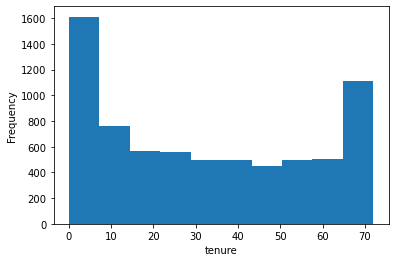

In [30]:
plt.hist(telco_df["tenure"])
plt.xlabel('tenure')
plt.ylabel('Frequency')

In [31]:
quant_5=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['customerID']].count()
Q_T_NO_S_df=quant_5.loc[quant_5['SeniorCitizen']==0] 
telco_Q_T_NO_S=pd.DataFrame(Q_T_NO_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"customerID"]).reset_index()
telco_Q_T_NO_S = telco_Q_T_NO_S.rename(columns={'index':'tenure' ,'customerID': 'No_Senior'})
telco_Q_T_NO_S['Data_lagged'] = telco_Q_T_NO_S['No_Senior'].shift(1)
telco_Q_T_NO_S["Data_lagged"] = telco_Q_T_NO_S["Data_lagged"].fillna(0)
telco_Q_T_NO_S["No_Senior_F"]=telco_Q_T_NO_S["No_Senior"]-telco_Q_T_NO_S["Data_lagged"]
telco_Q_T_NO_S=telco_Q_T_NO_S.drop(columns=['No_Senior','Data_lagged']) #Conteo de clientes No Senior que no son pérdida por cuartil de antiguedad

quant_5_No=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['customerID']].count()
telco_Q_T_NO_S_NO=quant_5_No.loc[(quant_5_No['Churn']=="No") & (quant_5_No['SeniorCitizen']==0)]
telco_Q_T_NO_S_NO=pd.DataFrame(telco_Q_T_NO_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"customerID"]).reset_index()
telco_Q_T_NO_S_NO = telco_Q_T_NO_S_NO.rename(columns={'index':'tenure' ,'customerID': 'No_Senior_No_Churn'})
telco_Q_T_NO_S_NO['Data_lagged'] = telco_Q_T_NO_S_NO['No_Senior_No_Churn'].shift(1)
telco_Q_T_NO_S_NO["Data_lagged"]=telco_Q_T_NO_S_NO["Data_lagged"].fillna(0)
telco_Q_T_NO_S_NO["No_Senior_No_Churn_F"]=telco_Q_T_NO_S_NO["No_Senior_No_Churn"]-telco_Q_T_NO_S_NO["Data_lagged"]
telco_Q_T_NO_S_NO=telco_Q_T_NO_S_NO.drop(columns=['No_Senior_No_Churn','Data_lagged']) #Conteo de clientes No Senior que no son pérdida por cuartil de antiguedad

merged_No_S_No_Churn = pd.merge(left=telco_Q_T_NO_S, right=telco_Q_T_NO_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_No_S_No_Churn['No_Senior_Yes_Churn_F']=merged_No_S_No_Churn['No_Senior_F']-merged_No_S_No_Churn['No_Senior_No_Churn_F']
merged_No_S_No_Churn['SeniorCitizen']=0
merged_No_S_No_Churn = merged_No_S_No_Churn.rename(columns={'No_Senior_F':'Total' ,'No_Senior_No_Churn_F': 'No_Churn', 'No_Senior_Yes_Churn_F': 'Yes_Churn'})

quant_6=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['customerID']].count()
Q_T_YES_S_df=quant_6.loc[quant_6['SeniorCitizen']==1].reset_index(drop=True)
telco_Q_T_YES_S=pd.DataFrame(Q_T_YES_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"customerID"]).reset_index() # se ajustan cuartiles al .93 para que alcance el 100% de los datos
telco_Q_T_YES_S['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_T_YES_S = telco_Q_T_YES_S.rename(columns={'index':'tenure' ,'customerID': 'Yes_Senior'})
telco_Q_T_YES_S['Data_lagged'] = telco_Q_T_YES_S['Yes_Senior'].shift(1)
telco_Q_T_YES_S["Data_lagged"] = telco_Q_T_YES_S["Data_lagged"].fillna(0)
telco_Q_T_YES_S["Yes_Senior_F"]=telco_Q_T_YES_S["Yes_Senior"]-telco_Q_T_YES_S["Data_lagged"]
telco_Q_T_YES_S=telco_Q_T_YES_S.drop(columns=['Yes_Senior','Data_lagged']) #Conteo de clientes yES Senior que no son pérdida por cuartil de antiguedad

quant_7=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['customerID']].count()
telco_Q_T_Yes_S_NO=quant_7.loc[(quant_7['Churn']=="No") & (quant_7['SeniorCitizen']==1)].reset_index(drop=True)
telco_Q_T_Yes_S_NO=pd.DataFrame(telco_Q_T_Yes_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"customerID"]).reset_index() # se ajustan cuartiles al .93 para que alcance el 100% de los datos
telco_Q_T_Yes_S_NO['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_T_Yes_S_NO = telco_Q_T_Yes_S_NO.rename(columns={'index':'tenure' ,'customerID': 'Yes_Senior_No_Churn'})
telco_Q_T_Yes_S_NO['Data_lagged'] = telco_Q_T_Yes_S_NO['Yes_Senior_No_Churn'].shift(1)
telco_Q_T_Yes_S_NO["Data_lagged"]=telco_Q_T_Yes_S_NO["Data_lagged"].fillna(0)
telco_Q_T_Yes_S_NO["Yes_Senior_No_Churn_F"]=telco_Q_T_Yes_S_NO["Yes_Senior_No_Churn"]-telco_Q_T_Yes_S_NO["Data_lagged"]
telco_Q_T_Yes_S_NO=telco_Q_T_Yes_S_NO.drop(columns=['Yes_Senior_No_Churn','Data_lagged']) #Conteo de clientes Yes Senior que no son pérdida por cuartil de antiguedad

merged_Yes_S_No_Churn = pd.merge(left=telco_Q_T_YES_S, right=telco_Q_T_Yes_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_Yes_S_No_Churn['Yes_Senior_Yes_Churn_F']=merged_Yes_S_No_Churn['Yes_Senior_F']-merged_Yes_S_No_Churn['Yes_Senior_No_Churn_F']
merged_Yes_S_No_Churn['SeniorCitizen']=1
merged_Yes_S_No_Churn = merged_Yes_S_No_Churn.rename(columns={'Yes_Senior_F':'Total' ,'Yes_Senior_No_Churn_F': 'No_Churn', 'Yes_Senior_Yes_Churn_F': 'Yes_Churn'})

telco_DF_Q_F_T=pd.concat([merged_No_S_No_Churn, merged_Yes_S_No_Churn])
telco_DF_Q_F_T = telco_DF_Q_F_T[[ "SeniorCitizen","tenure", "Total", "No_Churn", "Yes_Churn"]]
telco_DF_Q_F_T=telco_DF_Q_F_T.set_index(['SeniorCitizen','tenure'])
telco_DF_Q_F_T                           

Total  No_Churn  Yes_Churn
SeniorCitizen tenure                             
0             9.0     1574.0     844.0      730.0
              29.0    1441.0    1094.0      347.0
              55.0    1420.0    1203.0      217.0
              72.0    1466.0    1367.0       99.0
1             9.0      292.0      89.0      203.0
              29.0     277.0     143.0      134.0
              55.0     300.0     194.0      106.0
              72.0     273.0     240.0       33.0

The following result shows suggest that with more tenure the less likely the client will become churn; a strategy should be developed for the short term in order to minimize the churn rate. We will proceed to analyze the "TotalCharges" field by tenure quantile by senior citizen and churn.

In [32]:
telco_DF_Q_F_T.apply(lambda x: 100*x/float(x.sum()))

Total   No_Churn  Yes_Churn
SeniorCitizen tenure                                 
0             9.0     22.348431  16.312331  39.058320
              29.0    20.460031  21.144182  18.566078
              55.0    20.161863  23.250870  11.610487
              72.0    20.814994  26.420564   5.296950
1             9.0      4.145961   1.720139  10.861423
              29.0     3.932983   2.763819   7.169609
              55.0     4.259548   3.749517   5.671482
              72.0     3.876189   4.638578   1.765650

In [33]:
quant_1=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['TotalCharges']].sum()
Q_S_NO_S_df=quant_1.loc[quant_1['SeniorCitizen']==0] 
telco_Q_S_NO_S=pd.DataFrame(Q_S_NO_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"TotalCharges"]).reset_index()
telco_Q_S_NO_S = telco_Q_S_NO_S.rename(columns={'index':'tenure' ,'TotalCharges': 'No_Senior'})
telco_Q_S_NO_S['Data_lagged'] = telco_Q_S_NO_S['No_Senior'].shift(1)
telco_Q_S_NO_S["Data_lagged"] = telco_Q_S_NO_S["Data_lagged"].fillna(0)
telco_Q_S_NO_S["No_Senior_F"]=telco_Q_S_NO_S["No_Senior"]-telco_Q_S_NO_S["Data_lagged"]
telco_Q_S_NO_S=telco_Q_S_NO_S.drop(columns=['No_Senior','Data_lagged']) # Total amount by No Senior clients by tenure quantile.

quant_2=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['TotalCharges']].sum()
telco_Q_S_NO_S_NO=quant_2.loc[(quant_2['Churn']=="No") & (quant_2['SeniorCitizen']==0)]
telco_Q_S_NO_S_NO=pd.DataFrame(telco_Q_S_NO_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"TotalCharges"]).reset_index()
telco_Q_S_NO_S_NO = telco_Q_S_NO_S_NO.rename(columns={'index':'tenure' ,'TotalCharges': 'No_Senior_No_Churn'})
telco_Q_S_NO_S_NO['Data_lagged'] = telco_Q_S_NO_S_NO['No_Senior_No_Churn'].shift(1)
telco_Q_S_NO_S_NO["Data_lagged"]=telco_Q_S_NO_S_NO["Data_lagged"].fillna(0)
telco_Q_S_NO_S_NO["No_Senior_No_Churn_F"]=telco_Q_S_NO_S_NO["No_Senior_No_Churn"]-telco_Q_S_NO_S_NO["Data_lagged"]
telco_Q_S_NO_S_NO=telco_Q_S_NO_S_NO.drop(columns=['No_Senior_No_Churn','Data_lagged']) # Total amount by No Senior clients, which are not churn by tenure quantile.


merged_S_No_S_No_Churn = pd.merge(left=telco_Q_S_NO_S, right=telco_Q_S_NO_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_S_No_S_No_Churn['No_Senior_Yes_Churn_F']=merged_S_No_S_No_Churn['No_Senior_F']-merged_S_No_S_No_Churn['No_Senior_No_Churn_F']
merged_S_No_S_No_Churn['SeniorCitizen']=0
merged_S_No_S_No_Churn = merged_S_No_S_No_Churn.rename(columns={'No_Senior_F':'TotalCharges' ,'No_Senior_No_Churn_F': 'No_Churn', 'No_Senior_Yes_Churn_F': 'Yes_Churn'})

quant_3=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['TotalCharges']].sum()
Q_S_YES_S_df=quant_3.loc[quant_3['SeniorCitizen']==1].reset_index(drop=True)
telco_Q_S_YES_S=pd.DataFrame(Q_S_YES_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"TotalCharges"]).reset_index() 
telco_Q_S_YES_S['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_S_YES_S = telco_Q_S_YES_S.rename(columns={'index':'tenure' ,'TotalCharges': 'Yes_Senior'})
telco_Q_S_YES_S['Data_lagged'] = telco_Q_S_YES_S['Yes_Senior'].shift(1)
telco_Q_S_YES_S["Data_lagged"] = telco_Q_S_YES_S["Data_lagged"].fillna(0)
telco_Q_S_YES_S["Yes_Senior_F"]=telco_Q_S_YES_S["Yes_Senior"]-telco_Q_S_YES_S["Data_lagged"]
telco_Q_S_YES_S=telco_Q_S_YES_S.drop(columns=['Yes_Senior','Data_lagged']) # Total amount by Senior clients, by tenure quantile.

quant_4=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['TotalCharges']].sum()
telco_Q_S_Yes_S_NO=quant_4.loc[(quant_4['Churn']=="No") & (quant_4['SeniorCitizen']==1)].reset_index(drop=True)
telco_Q_S_Yes_S_NO=pd.DataFrame(telco_Q_S_Yes_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"TotalCharges"]).reset_index() 
telco_Q_S_Yes_S_NO['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_S_Yes_S_NO = telco_Q_S_Yes_S_NO.rename(columns={'index':'tenure' ,'TotalCharges': 'Yes_Senior_No_Churn'})
telco_Q_S_Yes_S_NO['Data_lagged'] = telco_Q_S_Yes_S_NO['Yes_Senior_No_Churn'].shift(1)
telco_Q_S_Yes_S_NO["Data_lagged"]=telco_Q_S_Yes_S_NO["Data_lagged"].fillna(0)
telco_Q_S_Yes_S_NO["Yes_Senior_No_Churn_F"]=telco_Q_S_Yes_S_NO["Yes_Senior_No_Churn"]-telco_Q_S_Yes_S_NO["Data_lagged"]
telco_Q_S_Yes_S_NO=telco_Q_S_Yes_S_NO.drop(columns=['Yes_Senior_No_Churn','Data_lagged']) # Total amount by Senior clients, which are churn by tenure quantile.

merged_S_Yes_S_No_Churn = pd.merge(left=telco_Q_S_YES_S, right=telco_Q_S_Yes_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_S_Yes_S_No_Churn['Yes_Senior_Yes_Churn_F']=merged_S_Yes_S_No_Churn['Yes_Senior_F']-merged_S_Yes_S_No_Churn['Yes_Senior_No_Churn_F']
merged_S_Yes_S_No_Churn['SeniorCitizen']=1
merged_S_Yes_S_No_Churn = merged_S_Yes_S_No_Churn.rename(columns={'Yes_Senior_F':'TotalCharges' ,'Yes_Senior_No_Churn_F': 'No_Churn', 'Yes_Senior_Yes_Churn_F': 'Yes_Churn'})

telco_DF_Q_F_S=pd.concat([merged_S_No_S_No_Churn, merged_S_Yes_S_No_Churn])
telco_DF_Q_F_S = telco_DF_Q_F_S[[ "SeniorCitizen","tenure", "TotalCharges", "No_Churn", "Yes_Churn"]]
telco_DF_Q_F_S=telco_DF_Q_F_S.set_index(['SeniorCitizen','tenure'])
telco_DF_Q_F_S    


TotalCharges     No_Churn  Yes_Churn
SeniorCitizen tenure                                      
0             9.0       329971.775   175307.375  154664.40
              29.0     1553724.350  1090053.050  463671.30
              55.0     3910714.800  3145845.100  764869.70
              72.0     7067578.750  6470262.400  597316.35
1             9.0        83919.550    27963.150   55956.40
              29.0      443388.600   221490.550  221898.05
              55.0     1098487.600   695294.850  403192.75
              72.0     1583755.500  1382397.550  201357.95

The result of this table is obvious, the longer the time with the services or services the longer the total spending that our clients had made. This result contrast with the preview one, because we have a higher volume of client churn in the lowest tenures but have a lower volume of spending. Now, we will proceed with the same format but, with the "MonthlyCharges" field.

In [34]:
telco_DF_Q_F_S.apply(lambda x: 100*x/float(x.sum()))

TotalCharges   No_Churn  Yes_Churn
SeniorCitizen tenure                                    
0             9.0         2.053143   1.327220   5.402317
              29.0        9.667551   8.252592  16.195709
              55.0       24.333166  23.816618  26.716355
              72.0       43.975738  48.985173  20.863835
1             9.0         0.522162   0.211704   1.954517
              29.0        2.758843   1.676864   7.750741
              55.0        6.834986   5.263950  14.083236
              72.0        9.854410  10.465879   7.033290

In [35]:
quant_1=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['MonthlyCharges']].sum()
Q_S_NO_S_df=quant_1.loc[quant_1['SeniorCitizen']==0] 
telco_Q_S_NO_S=pd.DataFrame(Q_S_NO_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"MonthlyCharges"]).reset_index()
telco_Q_S_NO_S = telco_Q_S_NO_S.rename(columns={'index':'tenure' ,'MonthlyCharges': 'No_Senior'})
telco_Q_S_NO_S['Data_lagged'] = telco_Q_S_NO_S['No_Senior'].shift(1)
telco_Q_S_NO_S["Data_lagged"] = telco_Q_S_NO_S["Data_lagged"].fillna(0)
telco_Q_S_NO_S["No_Senior_F"]=telco_Q_S_NO_S["No_Senior"]-telco_Q_S_NO_S["Data_lagged"]
telco_Q_S_NO_S=telco_Q_S_NO_S.drop(columns=['No_Senior','Data_lagged']) # Total Monthly amount by No Senior clients by tenure quantile.

quant_2=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['MonthlyCharges']].sum()
telco_Q_S_NO_S_NO=quant_2.loc[(quant_2['Churn']=="No") & (quant_2['SeniorCitizen']==0)]
telco_Q_S_NO_S_NO=pd.DataFrame(telco_Q_S_NO_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,1]).tolist(),"MonthlyCharges"]).reset_index()
telco_Q_S_NO_S_NO = telco_Q_S_NO_S_NO.rename(columns={'index':'tenure' ,'MonthlyCharges': 'No_Senior_No_Churn'})
telco_Q_S_NO_S_NO['Data_lagged'] = telco_Q_S_NO_S_NO['No_Senior_No_Churn'].shift(1)
telco_Q_S_NO_S_NO["Data_lagged"]=telco_Q_S_NO_S_NO["Data_lagged"].fillna(0)
telco_Q_S_NO_S_NO["No_Senior_No_Churn_F"]=telco_Q_S_NO_S_NO["No_Senior_No_Churn"]-telco_Q_S_NO_S_NO["Data_lagged"]
telco_Q_S_NO_S_NO=telco_Q_S_NO_S_NO.drop(columns=['No_Senior_No_Churn','Data_lagged']) # Total Monthly amount by No Senior clients, which are not churn by tenure quantile.


merged_S_No_S_No_Churn = pd.merge(left=telco_Q_S_NO_S, right=telco_Q_S_NO_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_S_No_S_No_Churn['No_Senior_Yes_Churn_F']=merged_S_No_S_No_Churn['No_Senior_F']-merged_S_No_S_No_Churn['No_Senior_No_Churn_F']
merged_S_No_S_No_Churn['SeniorCitizen']=0
merged_S_No_S_No_Churn = merged_S_No_S_No_Churn.rename(columns={'No_Senior_F':'MonthlyCharges' ,'No_Senior_No_Churn_F': 'No_Churn', 'No_Senior_Yes_Churn_F': 'Yes_Churn'})

quant_3=telco_df.sort_values(by='tenure').groupby(['SeniorCitizen','tenure'], as_index=False)[['MonthlyCharges']].sum()
Q_S_YES_S_df=quant_3.loc[quant_3['SeniorCitizen']==1].reset_index(drop=True)
telco_Q_S_YES_S=pd.DataFrame(Q_S_YES_S_df.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"MonthlyCharges"]).reset_index()
telco_Q_S_YES_S['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_S_YES_S = telco_Q_S_YES_S.rename(columns={'index':'tenure' ,'MonthlyCharges': 'Yes_Senior'})
telco_Q_S_YES_S['Data_lagged'] = telco_Q_S_YES_S['Yes_Senior'].shift(1)
telco_Q_S_YES_S["Data_lagged"] = telco_Q_S_YES_S["Data_lagged"].fillna(0)
telco_Q_S_YES_S["Yes_Senior_F"]=telco_Q_S_YES_S["Yes_Senior"]-telco_Q_S_YES_S["Data_lagged"]
telco_Q_S_YES_S=telco_Q_S_YES_S.drop(columns=['Yes_Senior','Data_lagged']) # Total Monthly amount by Senior clients by tenure quantile.

quant_4=telco_df.sort_values(by='tenure').groupby(['Churn', 'SeniorCitizen','tenure'],as_index=False)[['MonthlyCharges']].sum()
telco_Q_S_Yes_S_NO=quant_4.loc[(quant_4['Churn']=="No") & (quant_4['SeniorCitizen']==1)].reset_index(drop=True)
telco_Q_S_Yes_S_NO=pd.DataFrame(telco_Q_S_Yes_S_NO.cumsum().loc[telco_df["tenure"].quantile([.25,.5,.75,.93]).tolist(),"MonthlyCharges"]).reset_index() 
telco_Q_S_Yes_S_NO['index']=telco_df["tenure"].quantile([.25,.5,.75,1]).tolist()
telco_Q_S_Yes_S_NO = telco_Q_S_Yes_S_NO.rename(columns={'index':'tenure' ,'MonthlyCharges': 'Yes_Senior_No_Churn'})
telco_Q_S_Yes_S_NO['Data_lagged'] = telco_Q_S_Yes_S_NO['Yes_Senior_No_Churn'].shift(1)
telco_Q_S_Yes_S_NO["Data_lagged"]=telco_Q_S_Yes_S_NO["Data_lagged"].fillna(0)
telco_Q_S_Yes_S_NO["Yes_Senior_No_Churn_F"]=telco_Q_S_Yes_S_NO["Yes_Senior_No_Churn"]-telco_Q_S_Yes_S_NO["Data_lagged"]
telco_Q_S_Yes_S_NO=telco_Q_S_Yes_S_NO.drop(columns=['Yes_Senior_No_Churn','Data_lagged']) # Total Monthly amount by Senior clients, which are not churn by tenure quantile.
merged_S_Yes_S_No_Churn = pd.merge(left=telco_Q_S_YES_S, right=telco_Q_S_Yes_S_NO, how='left', left_on='tenure', right_on='tenure')
merged_S_Yes_S_No_Churn['Yes_Senior_Yes_Churn_F']=merged_S_Yes_S_No_Churn['Yes_Senior_F']-merged_S_Yes_S_No_Churn['Yes_Senior_No_Churn_F']
merged_S_Yes_S_No_Churn['SeniorCitizen']=1
merged_S_Yes_S_No_Churn = merged_S_Yes_S_No_Churn.rename(columns={'Yes_Senior_F':'MonthlyCharges' ,'Yes_Senior_No_Churn_F': 'No_Churn', 'Yes_Senior_Yes_Churn_F': 'Yes_Churn'})

telco_DF_Q_M_S=pd.concat([merged_S_No_S_No_Churn, merged_S_Yes_S_No_Churn])
telco_DF_Q_M_S = telco_DF_Q_M_S[[ "SeniorCitizen","tenure", "MonthlyCharges", "No_Churn", "Yes_Churn"]]
telco_DF_Q_M_S=telco_DF_Q_M_S.set_index(['SeniorCitizen','tenure'])
telco_DF_Q_M_S    


MonthlyCharges  No_Churn  Yes_Churn
SeniorCitizen tenure                                     
0             9.0           83938.30  37610.70   46327.60
              29.0          83115.05  56301.35   26813.70
              55.0          91392.55  73095.60   18296.95
              72.0         106515.85  97242.85    9273.00
1             9.0           20289.90   5719.75   14570.15
              29.0          21863.05  10600.85   11262.20
              55.0          25213.85  15722.90    9490.95
              72.0          23788.05  20691.75    3096.30

Surprisingly the volume of monthly charges of the clients that become churn is higher in the lowest tenure levels than in the higher tenure levels, this suggest an increase of cost of our services or the clients contracted a higher number of services and possibly suggest that the price was a reason to leave the service. We will proceed to check the 2 basic services of the company, the phone service, and the internet service.

In [36]:
telco_DF_Q_M_S.apply(lambda x: 100*x/float(x.sum()))

MonthlyCharges   No_Churn  Yes_Churn
SeniorCitizen tenure                                      
0             9.0          18.402816  11.865108  33.297863
              29.0         18.222325  17.761477  19.272289
              55.0         20.037102  23.059585  13.150894
              72.0         23.352768  30.677357   6.664949
1             9.0           4.448402   1.804419  10.472264
              29.0          4.793303   3.344267   8.094682
              55.0          5.527940   4.960128   6.821600
              72.0          5.215344   6.527659   2.225459

Most of our clients has phone service, an outstanding 90%.

In [37]:
telco_df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [38]:
6361/7043

0.9031662643759761

1 every 4 clients are churn with internet service, surprisingly the fastest internet service become the most churn percentage of customers with 1,268. Suggest that could be related with the services provided or the cost of the service.

In [39]:
telco_df.groupby(['Churn','InternetService'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum())) 

customerID
Churn InternetService            
No    DSL               27.857447
      Fiber optic       25.543092
      No                20.062473
Yes   DSL                6.517109
      Fiber optic       18.415448
      No                 1.604430

The billing method suggest that our clients with electronic check has higher probabilities of becoming churn clients due to the surprisingly 15% of churn clients on the electronic check payment method compared to the rest.

In [40]:
telco_df.groupby(['Churn','PaymentMethod'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum()))

customerID
Churn PaymentMethod                        
No    Bank transfer (automatic)   18.259265
      Credit card (automatic)     18.316058
      Electronic check            18.372852
      Mailed check                18.514837
Yes   Bank transfer (automatic)    3.663212
      Credit card (automatic)      3.294051
      Electronic check            15.206588
      Mailed check                 4.373136

In addition, paperless billing suggests that customers that have paperless billing have higher chances to become churn. We will proceed to check if customers with dependents or partners have a different behavior but, first we will check customer contracts.

In [41]:
telco_df.groupby(['Churn','Contract'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum())) 

customerID
Churn Contract                  
No    Month-to-month   31.520659
      One year         18.557433
      Two year         23.384921
Yes   Month-to-month   23.498509
      One year          2.356950
      Two year          0.681528

It seems that monthly based clients are more likely to become churn that clients with a longer-term contract.

In [42]:
telco_df.groupby(['Churn','PaperlessBilling'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum()))

customerID
Churn PaperlessBilling            
No    No                 34.118983
      Yes                39.344030
Yes   No                  6.659094
      Yes                19.877893

It seems that clients with partner are less likely to become churn.

In [43]:
telco_df.groupby(['Churn','Partner'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum())) 

customerID
Churn Partner            
No    No        34.658526
      Yes       38.804487
Yes   No        17.038194
      Yes        9.498793

Most of the churn is with clients without dependents, this suggest that people with dependents would be less likely to become churn.

In [44]:
telco_df.groupby(['Churn','Dependents'])[['customerID']].count().apply(lambda x: 100*x/float(x.sum())) 

customerID
Churn Dependents            
No    No           48.132898
      Yes          25.330115
Yes   No           21.908278
      Yes           4.628709

## Data Modeling

For the model selection we reviewed the variables in the dataset and found out that most were categoric variables, which does not allow us to use PCA Analysis nor clustering to select variables, it exists methods like KMode to cluster categoric data, but does not cluster by variable or column of the dataset, it clusters by row or register, in this case client. So, the model that could help us to leverage the or find the most important variables for decision making is a Classifier Random Forest. Another good option could be Logistic Regression but, due to the high categoric variables is better and is a more robust model the Classifier Random Forest.

First, we will transform all our categoric variables to 0-1, in the case of having more than 2 option will be 0-1-2, etc.

In [45]:
telco_model_df=telco_df.copy()
telco_model_df=telco_model_df.set_index('customerID')
telco_model_df.loc[:,'gender']=telco_model_df.loc[:,'gender'].replace(to_replace=['Male', 'Female'], value=[0,1])
telco_model_df.iloc[:,2:4]=telco_model_df.iloc[:,2:4].replace(to_replace=['No', 'Yes'], value=[0,1])
telco_model_df.iloc[:,5:20]=telco_model_df.iloc[:,5:20].replace(to_replace=['No', 'Yes', 'No phone service','DSL', 'Fiber optic', 'Month-to-month', 'One year', 'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check', 'No internet service' ], value=[0, 1, 3, 1, 2, 0, 1, 2, 0, 1, 2, 3, 2])

We will set a seed to make our results reproducible. Also, we use in some parts of the code random_state=1 to make sure that the model is reproducible.

In [46]:
import random 
random.seed(1)

We will separate the inputs and the output for the model, our output or variable to predict is Churn and the inputs are the rest of the dataset.

In [47]:
labels = np.array(telco_model_df['Churn'])
features= telco_model_df.drop('Churn', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

For a good model generation, we need to use Cross Validation, which splits the data sampled randomly to reduce bias and helps us to not generate an overfitted model that when new data arrives to the model we can obtain a good prediction instead of a biased prediction. For the Cross Validation we will split the data in 70-30, being 70% the training part and 30% the testing. 
This applies to our features and objective variable (Churn).

In [48]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 1)

Now, before we could train our model, first we need to do some hyperparameter tunning with the training set to build a good predictive model. The parameters of a Classifier Random Forest are the same of a Regression Random forest, we need to know the how wide (number of splits), how dense (number of trees), how depth the trees should be, because the random forest could be and infinite series of trees, because with each partition from the node or root of the forest the data becomes more homogeneous in the node but, more heterogeneous between nodes, this could derive that with each split or node created we reach a point that for each leaf is a different variable, which means that we have information loss (variance) and a biased model.

On the other, hand we must have the minimum correct amount of splits or nodes in order to reduce noise in the data, variables that does not provide any information to the model due to uncorrelation.

Bottom line, Randomsearch will allow us to start the hyperparameter tunning by discarding some hyperparameters values and giving us a better starting point. In other words, Random search allowed us to narrow down the range for each hyperparameter. 

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Now we will proceed to create a random model to tune and obtain their best parameters and use them as guide for obtaining better parameters. 

In [50]:
rf = RandomForestClassifier(random_state = 1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [51]:
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 11.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, verbose=2)

The best parameters from our random model are the following.

In [52]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

Now, we will proceed to use Gridsearch to obtain the best possible parameters narrowed by Randomsearch, which instead of looking for all the best possible combinations we could get a set of good combination (gives a model above 75% prediction) to train and test our model.

In [53]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [1000, 1400, 2000]
}
rf = RandomForestClassifier(random_state = 1)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [54]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 17.9min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 1400}

Now, we have better hyperparameters, we will proceed to train and test our model.

In [55]:
forest = RandomForestClassifier(bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1400, random_state = 1)
forest.fit(train_features, train_labels)

RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=1400, random_state=1)

In [56]:
y_pred_test=forest.predict(test_features)

The accuracy of our model is the following:

In [57]:
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred_test))

Accuracy: 0.8177946048272599


Confusion Matrix

In [58]:
metrics.confusion_matrix(test_labels, y_pred_test)

array([[1438,  147],
       [ 238,  290]], dtype=int64)

Now that we have a good model, we will proceed to observe the feature of importance's to narrow the variables we should focus and generate strategies.

In [59]:
feature_names = list(feature_list)

In [60]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

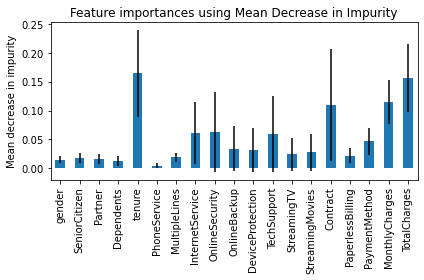

In [61]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [62]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tenure               Importance: 0.16
Variable: TotalCharges         Importance: 0.16
Variable: MonthlyCharges       Importance: 0.12
Variable: Contract             Importance: 0.11
Variable: InternetService      Importance: 0.06
Variable: OnlineSecurity       Importance: 0.06
Variable: TechSupport          Importance: 0.06
Variable: PaymentMethod        Importance: 0.05
Variable: OnlineBackup         Importance: 0.03
Variable: DeviceProtection     Importance: 0.03
Variable: StreamingMovies      Importance: 0.03
Variable: SeniorCitizen        Importance: 0.02
Variable: Partner              Importance: 0.02
Variable: MultipleLines        Importance: 0.02
Variable: StreamingTV          Importance: 0.02
Variable: PaperlessBilling     Importance: 0.02
Variable: gender               Importance: 0.01
Variable: Dependents           Importance: 0.01
Variable: PhoneService         Importance: 0.0


We can observe that the top seven variables are: 
1. tenure
2. TotalCharges 
3. MonthlyCharges 
4. Contract 
5. InternetService 
6. Online Security 
7. TechSupport
8. Payment Method

The table from above, shows us that some variables analyzed in the exploratory data analysis are not that meaningful for the business. We need to focus in the top 8, which tenure and TotalCharges are variables that logically or commonly together, with the following logic, as more time with the service the total spending by our client is higher.

## Strategy

In conclusion, we can answer the business case, which will be concluded by the following strategies for increasing the customer engagement:
1. Generate a customer membership reward program that becomes better or upgrades every year or certain number of months to the client to be more engaged with the service.
2. The monthly charge should be reduced and/or offer another kind of periodical payment as bimestrial or semestral, annual etc. and focus on actual clients migration through different incentives or a good marketing campaign.
3. Promote longer term contracts because we generate more engagement with our clients and migrate monthly based contracts to longer term contracts for example 1- or 2- years contract by giving away small discounts.
4. Create a package with internet service, online security, and tech support for the same or a little bit higher price than the stand-alone internet service.
5. Automate payment method and migrate actual clients to automated payment methods to increase their engagement. Encourage should be addressed by offering a small discount, rewards more services or a better-quality service and lower the quality of their service with the actual payment method.

## Apendix

Code for exporting prepared dataset for Classifier Random Forest replication.

In [63]:
np.savetxt('RF_Dataset.txt', telco_model_df, fmt='%d', delimiter=" ", header="gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn" )
